In [12]:
#libaries Ill be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#NBA_API
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo, shotchartdetail, teamgamelog, boxscoreadvancedv2, leaguedashplayerstats, leaguedashteamstats
from nba_api.stats.static import *

#Basketball Reference API
from basketball_reference_web_scraper import client

#functions used in this file
from SGA_functions import *


## Player Analysis 
- **Name**: Shai Gilgeous-Alexander 
- **Position**: PG / SG
- **Height**: 6'6 
- **Weight**: 195 lbs
- **College**: Kentucky
- **Draft Year**: 2018 (Round 1 pick 11)
- **Country**: Canada

## Introduction
This notebook provides a detailed analysis of Shai Gilgeous-Alexander's performance throughout his NBA career. We will examine each season individually and then compare his progress over the years.



In [2]:
#player info and player ID
player_id = players.find_players_by_full_name('shai gilgeous-alexander')[0]['id']
player_name = 'Shai Gilgeous-Alexander'
seasons = ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23','2023-24','2024-25']
player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id).get_data_frames()[0]

In [3]:
#player career stats
data = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
data.describe()

,PLAYER_ID,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
count,7.0,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1628983.0,1.610613e+09,23.000000,66.000000,64.714286,2184.428571,563.285714,1124.571429,0.49600,87.714286,...,0.843143,50.142857,265.714286,315.857143,337.428571,95.142857,52.857143,153.142857,149.142857,1613.428571
std,0.0,5.291503e+00,2.160247,15.905974,14.716366,497.928327,224.521502,403.495088,0.02962,37.043732,...,0.047062,17.237832,83.721193,95.004261,109.688737,40.961073,18.096303,29.486882,43.375986,672.973218
min,1628983.0,1.610613e+09,20.000000,35.000000,35.000000,1180.000000,287.000000,565.000000,0.45300,51.000000,...,0.800000,19.000000,147.000000,166.000000,207.000000,27.000000,23.000000,106.000000,70.000000,830.000000
25%,1628983.0,1.610613e+09,21.500000,62.000000,62.000000,2058.000000,409.000000,865.500000,0.47350,64.500000,...,0.807500,42.000000,208.000000,255.000000,251.000000,75.000000,45.500000,137.500000,129.500000,1110.000000
50%,1628983.0,1.610613e+09,23.000000,70.000000,70.000000,2416.000000,478.000000,1052.000000,0.50800,87.000000,...,0.810000,57.000000,270.000000,329.000000,331.000000,96.000000,47.000000,154.000000,164.000000,1371.000000
75%,1628983.0,1.610613e+09,24.500000,75.500000,74.000000,2490.500000,750.000000,1434.000000,0.51450,92.000000,...,0.886000,62.000000,331.000000,395.500000,418.000000,121.500000,66.000000,172.500000,179.500000,2194.500000
max,1628983.0,1.610613e+09,26.000000,82.000000,76.000000,2598.000000,860.000000,1656.000000,0.53500,163.000000,...,0.905000,67.000000,365.000000,415.000000,486.000000,150.000000,77.000000,192.000000,192.000000,2484.000000


In [5]:
#points,reb, assist trends
all_seasons_basic_data = pd.DataFrame()

for season in seasons:
    data = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
    season_basic_data = data.loc[data['SEASON_ID'] == season]
    all_seasons_basic_data = pd.concat([all_seasons_basic_data, season_basic_data], ignore_index=True)

all_seasons_basic_data
    
    

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1628983,2018-19,00,1610612746,LAC,20.0,82,73,2174,341,...,0.800,57,175,232,270,96,45,141,175,889
1,1628983,2019-20,00,1610612760,OKC,21.0,70,70,2428,478,...,0.807,47,365,412,232,79,47,134,117,1331
2,1628983,2020-21,00,1610612760,OKC,22.0,35,35,1180,287,...,0.808,19,147,166,207,27,23,106,70,830
3,1628983,2021-22,00,1610612760,OKC,23.0,56,56,1942,477,...,0.810,37,241,278,331,71,46,154,142,1371
4,1628983,2022-23,00,1610612760,OKC,24.0,68,68,2416,704,...,0.905,59,270,329,371,112,65,192,192,2135
5,1628983,2023-24,00,1610612760,OKC,25.0,75,75,2553,796,...,0.874,65,350,415,465,150,67,162,184,2254
6,1628983,2024-25,00,1610612760,OKC,26.0,76,76,2598,860,...,0.898,67,312,379,486,131,77,183,164,2484


### Looked at how Shai has performed in his last 7 seasons

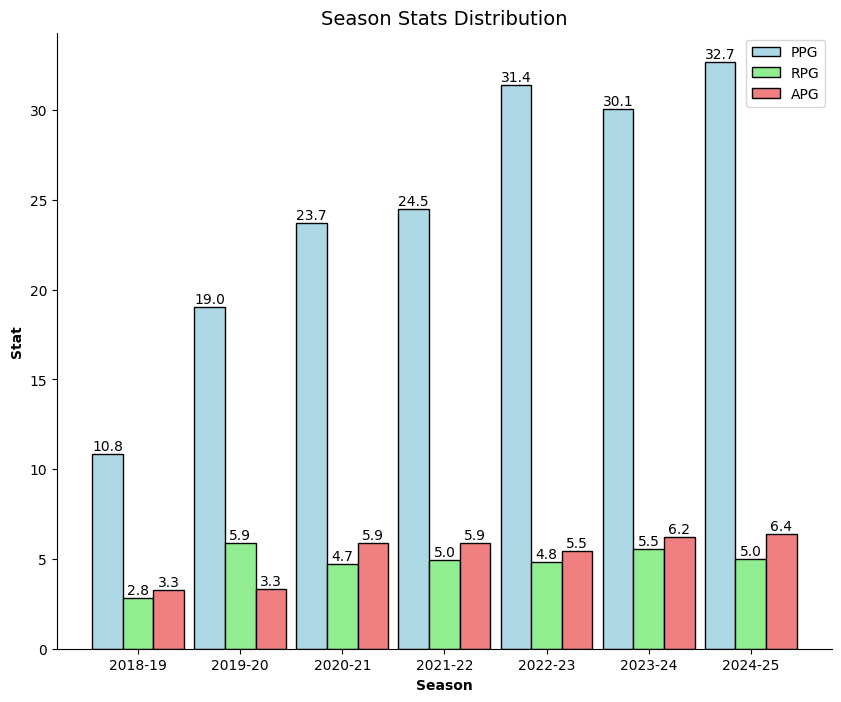

In [6]:
all_seasons_basic_data = pd.DataFrame()

# Fetch basic stats for each season and concatenate them into a single DataFrame
for season in seasons:
    data = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
    season_basic_data = data.loc[data['SEASON_ID'] == season]
    all_seasons_basic_data = pd.concat([all_seasons_basic_data, season_basic_data], ignore_index=True)

# Extract PPG, RPG, and APG for the bar chart
ppg = all_seasons_basic_data['PTS'] / all_seasons_basic_data['GP']
rpg = all_seasons_basic_data['REB'] / all_seasons_basic_data['GP']
apg = all_seasons_basic_data['AST'] / all_seasons_basic_data['GP']

# Setting the bar width
bar_width = 0.30

# Setting the position of bars on the x-axis
r1 = np.arange(len(seasons))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating the bar chart
plt.figure(figsize=(10, 8))
bars1 = plt.bar(r1, ppg, color='lightblue', width=bar_width, edgecolor='black', label='PPG')
bars2 = plt.bar(r2, rpg, color='lightgreen', width=bar_width, edgecolor='black', label='RPG')
bars3 = plt.bar(r3, apg, color='lightcoral', width=bar_width, edgecolor='black', label='APG')

# Adding numbers on top of the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)

# Adding labels
plt.xlabel('Season', fontweight='bold')
plt.ylabel('Stat', fontweight='bold')
plt.title('Season Stats Distribution', fontsize=14)
plt.xticks([r + bar_width for r in range(len(seasons))], seasons)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.show()


=== SHAI GILGEOUS-ALEXANDER: COMPREHENSIVE EDA & 2025-26 PREDICTION ===

📊 SECTION 1: CAREER TRAJECTORY ANALYSIS
--------------------------------------------------
📈 Career spans 7 seasons from 2018-19 to 2024-25

Basic Career Stats Overview:
    Season    PPG   RPG   APG   FG%   FT%  3FG%    MPG  GP
0  2018-19  10.84  2.83  3.29  0.48  0.80  0.37  26.51  82
1  2019-20  19.01  5.89  3.31  0.47  0.81  0.35  34.69  70
2  2020-21  23.71  4.74  5.91  0.51  0.81  0.42  33.71  35
3  2021-22  24.48  4.96  5.91  0.45  0.81  0.30  34.68  56
4  2022-23  31.40  4.84  5.46  0.51  0.90  0.34  35.53  68
5  2023-24  30.05  5.53  6.20  0.54  0.87  0.35  34.04  75
6  2024-25  32.68  4.99  6.39  0.52  0.90  0.38  34.18  76

📊 SECTION 2: DETAILED STATISTICAL ANALYSIS
--------------------------------------------------


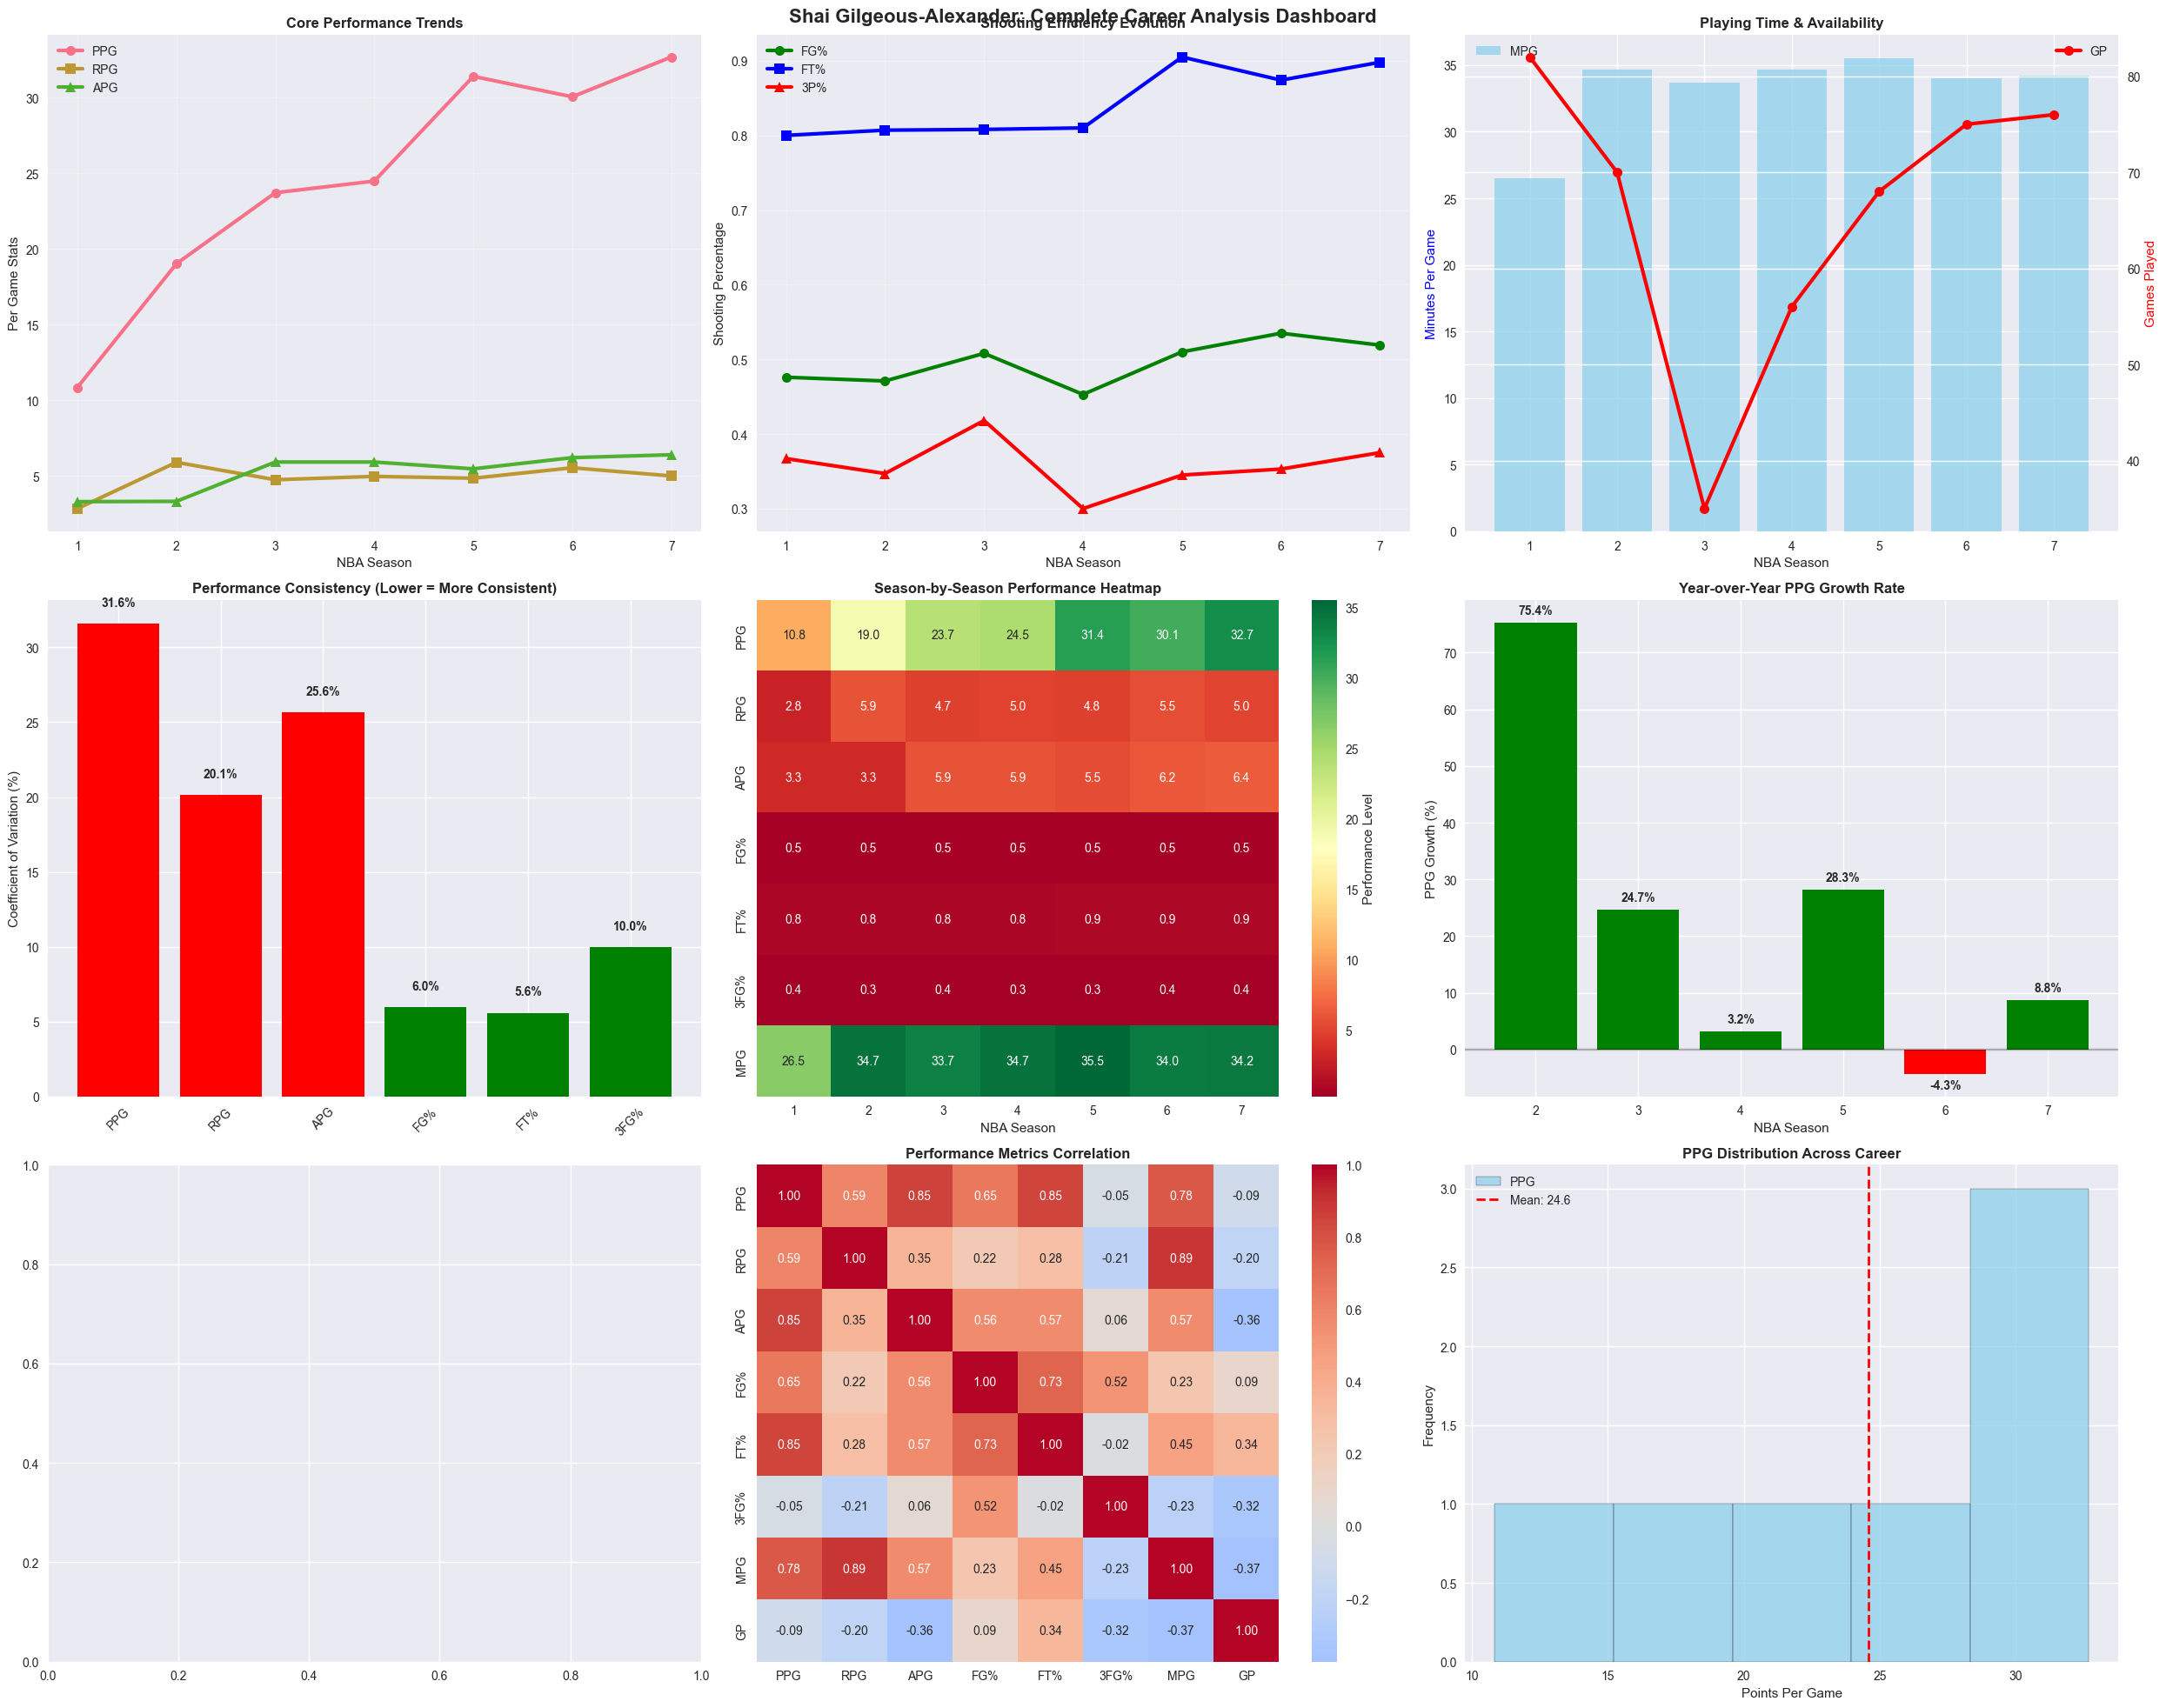

In [16]:
print("=== SHAI GILGEOUS-ALEXANDER: COMPREHENSIVE EDA & 2025-26 PREDICTION ===")
print("=" * 80)

# 1. CAREER OVERVIEW AND TRENDS
print("\n📊 SECTION 1: CAREER TRAJECTORY ANALYSIS")
print("-" * 50)

# Get comprehensive career data
player_id = players.find_players_by_full_name('shai gilgeous-alexander')[0]['id']
seasons = ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24', '2024-25']
season_years = [2019, 2020, 2021, 2022, 2023, 2024, 2025]  # For regression

# Collect all season data
career_data = []
for i, season in enumerate(seasons):
    try:
        # Basic stats
        stats = get_players_stats(player_id, season)
        
        # Add season info
        stats['Season'] = season
        stats['Year'] = season_years[i]
        stats['NBA_Year'] = i + 1  # 1st year, 2nd year, etc.
        
        career_data.append(stats)
    except Exception as e:
        print(f"Could not retrieve data for {season}: {e}")

# Convert to DataFrame
df_career = pd.DataFrame(career_data)
print(f"📈 Career spans {len(df_career)} seasons from {seasons[0]} to {seasons[-1]}")
print("\nBasic Career Stats Overview:")
print(df_career[['Season', 'PPG', 'RPG', 'APG', 'FG%', 'FT%', '3FG%', 'MPG', 'GP']].round(2))

# 2. COMPREHENSIVE STATISTICAL ANALYSIS
print(f"\n📊 SECTION 2: DETAILED STATISTICAL ANALYSIS")
print("-" * 50)

# Create comprehensive visualization dashboard
fig, axes = plt.subplots(3, 3, figsize=(25, 20))
fig.suptitle('Shai Gilgeous-Alexander: Complete Career Analysis Dashboard', fontsize=16, fontweight='bold')

# 2.1 Core Performance Metrics
ax1 = axes[0, 0]
ax1.plot(df_career['NBA_Year'], df_career['PPG'], marker='o', linewidth=3, markersize=8, label='PPG')
ax1.plot(df_career['NBA_Year'], df_career['RPG'], marker='s', linewidth=3, markersize=8, label='RPG')  
ax1.plot(df_career['NBA_Year'], df_career['APG'], marker='^', linewidth=3, markersize=8, label='APG')
ax1.set_title('Core Performance Trends', fontweight='bold')
ax1.set_xlabel('NBA Season')
ax1.set_ylabel('Per Game Stats')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2.2 Shooting Efficiency Evolution
ax2 = axes[0, 1]
ax2.plot(df_career['NBA_Year'], df_career['FG%'], marker='o', linewidth=3, markersize=8, label='FG%', color='green')
ax2.plot(df_career['NBA_Year'], df_career['FT%'], marker='s', linewidth=3, markersize=8, label='FT%', color='blue')
ax2.plot(df_career['NBA_Year'], df_career['3FG%'], marker='^', linewidth=3, markersize=8, label='3P%', color='red')
ax2.set_title('Shooting Efficiency Evolution', fontweight='bold')
ax2.set_xlabel('NBA Season')
ax2.set_ylabel('Shooting Percentage')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 2.3 Minutes and Games Analysis
ax3 = axes[0, 2]
ax3_twin = ax3.twinx()
bars1 = ax3.bar(df_career['NBA_Year'], df_career['MPG'], alpha=0.7, color='skyblue', label='MPG')
line1 = ax3_twin.plot(df_career['NBA_Year'], df_career['GP'], marker='o', color='red', linewidth=3, markersize=8, label='GP')
ax3.set_title('Playing Time & Availability', fontweight='bold')
ax3.set_xlabel('NBA Season')
ax3.set_ylabel('Minutes Per Game', color='blue')
ax3_twin.set_ylabel('Games Played', color='red')
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

# 2.4 Performance Consistency (Coefficient of Variation)
metrics = ['PPG', 'RPG', 'APG', 'FG%', 'FT%', '3FG%']
cv_scores = []
for metric in metrics:
    cv = (df_career[metric].std() / df_career[metric].mean()) * 100
    cv_scores.append(cv)

ax4 = axes[1, 0]
bars = ax4.bar(metrics, cv_scores, color=['red' if cv > 20 else 'orange' if cv > 10 else 'green' for cv in cv_scores])
ax4.set_title('Performance Consistency (Lower = More Consistent)', fontweight='bold')
ax4.set_ylabel('Coefficient of Variation (%)')
ax4.set_xticklabels(metrics, rotation=45)
for i, v in enumerate(cv_scores):
    ax4.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2.5 Career Progression Heatmap
progression_data = df_career[['NBA_Year', 'PPG', 'RPG', 'APG', 'FG%', 'FT%', '3FG%', 'MPG']].set_index('NBA_Year')
ax5 = axes[1, 1]
sns.heatmap(progression_data.T, annot=True, fmt='.1f', cmap='RdYlGn', ax=ax5, cbar_kws={'label': 'Performance Level'})
ax5.set_title('Season-by-Season Performance Heatmap', fontweight='bold')
ax5.set_xlabel('NBA Season')

# 2.6 Points Per Game Growth Analysis
ax6 = axes[1, 2]
ppg_growth = df_career['PPG'].pct_change() * 100
bars = ax6.bar(df_career['NBA_Year'][1:], ppg_growth[1:], 
               color=['green' if x > 0 else 'red' for x in ppg_growth[1:]])
ax6.set_title('Year-over-Year PPG Growth Rate', fontweight='bold')
ax6.set_xlabel('NBA Season')
ax6.set_ylabel('PPG Growth (%)')
ax6.axhline(y=0, color='black', linestyle='-', alpha=0.3)
for i, v in enumerate(ppg_growth[1:]):
    if not np.isnan(v):
        ax6.text(i+2, v + (1 if v > 0 else -1), f'{v:.1f}%', ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

# 2.7 Advanced Metrics Radar Chart (if we can get advanced stats)
# ax7 = axes[2, 0]
# # This would require advanced stats - we'll create a placeholder for now
# ax7.text(0.5, 0.5, 'Advanced Metrics\n(PER, TS%, USG%, etc.)\nRequires additional data', 
#          ha='center', va='center', transform=ax7.transAxes, fontsize=12)
# ax7.set_title('Advanced Metrics Analysis', fontweight='bold')

# 2.8 Correlation Matrix
ax8 = axes[2, 1]
corr_data = df_career[['PPG', 'RPG', 'APG', 'FG%', 'FT%', '3FG%', 'MPG', 'GP']].corr()
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax8)
ax8.set_title('Performance Metrics Correlation', fontweight='bold')

# 2.9 Performance Distribution
ax9 = axes[2, 2]
ax9.hist(df_career['PPG'], bins=5, alpha=0.7, color='skyblue', edgecolor='black', label='PPG')
ax9.set_title('PPG Distribution Across Career', fontweight='bold')
ax9.set_xlabel('Points Per Game')
ax9.set_ylabel('Frequency')
ax9.axvline(df_career['PPG'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_career["PPG"].mean():.1f}')
ax9.legend()

plt.tight_layout()
plt.show()

### Visualizing Player Shots on an NBA Court

### Using the guide from [Savvas Tjortjoglou's blog](http://savvastjortjoglou.com/nba-shot-sharts.html), I was able to construct an NBA court diagram to display player shots.

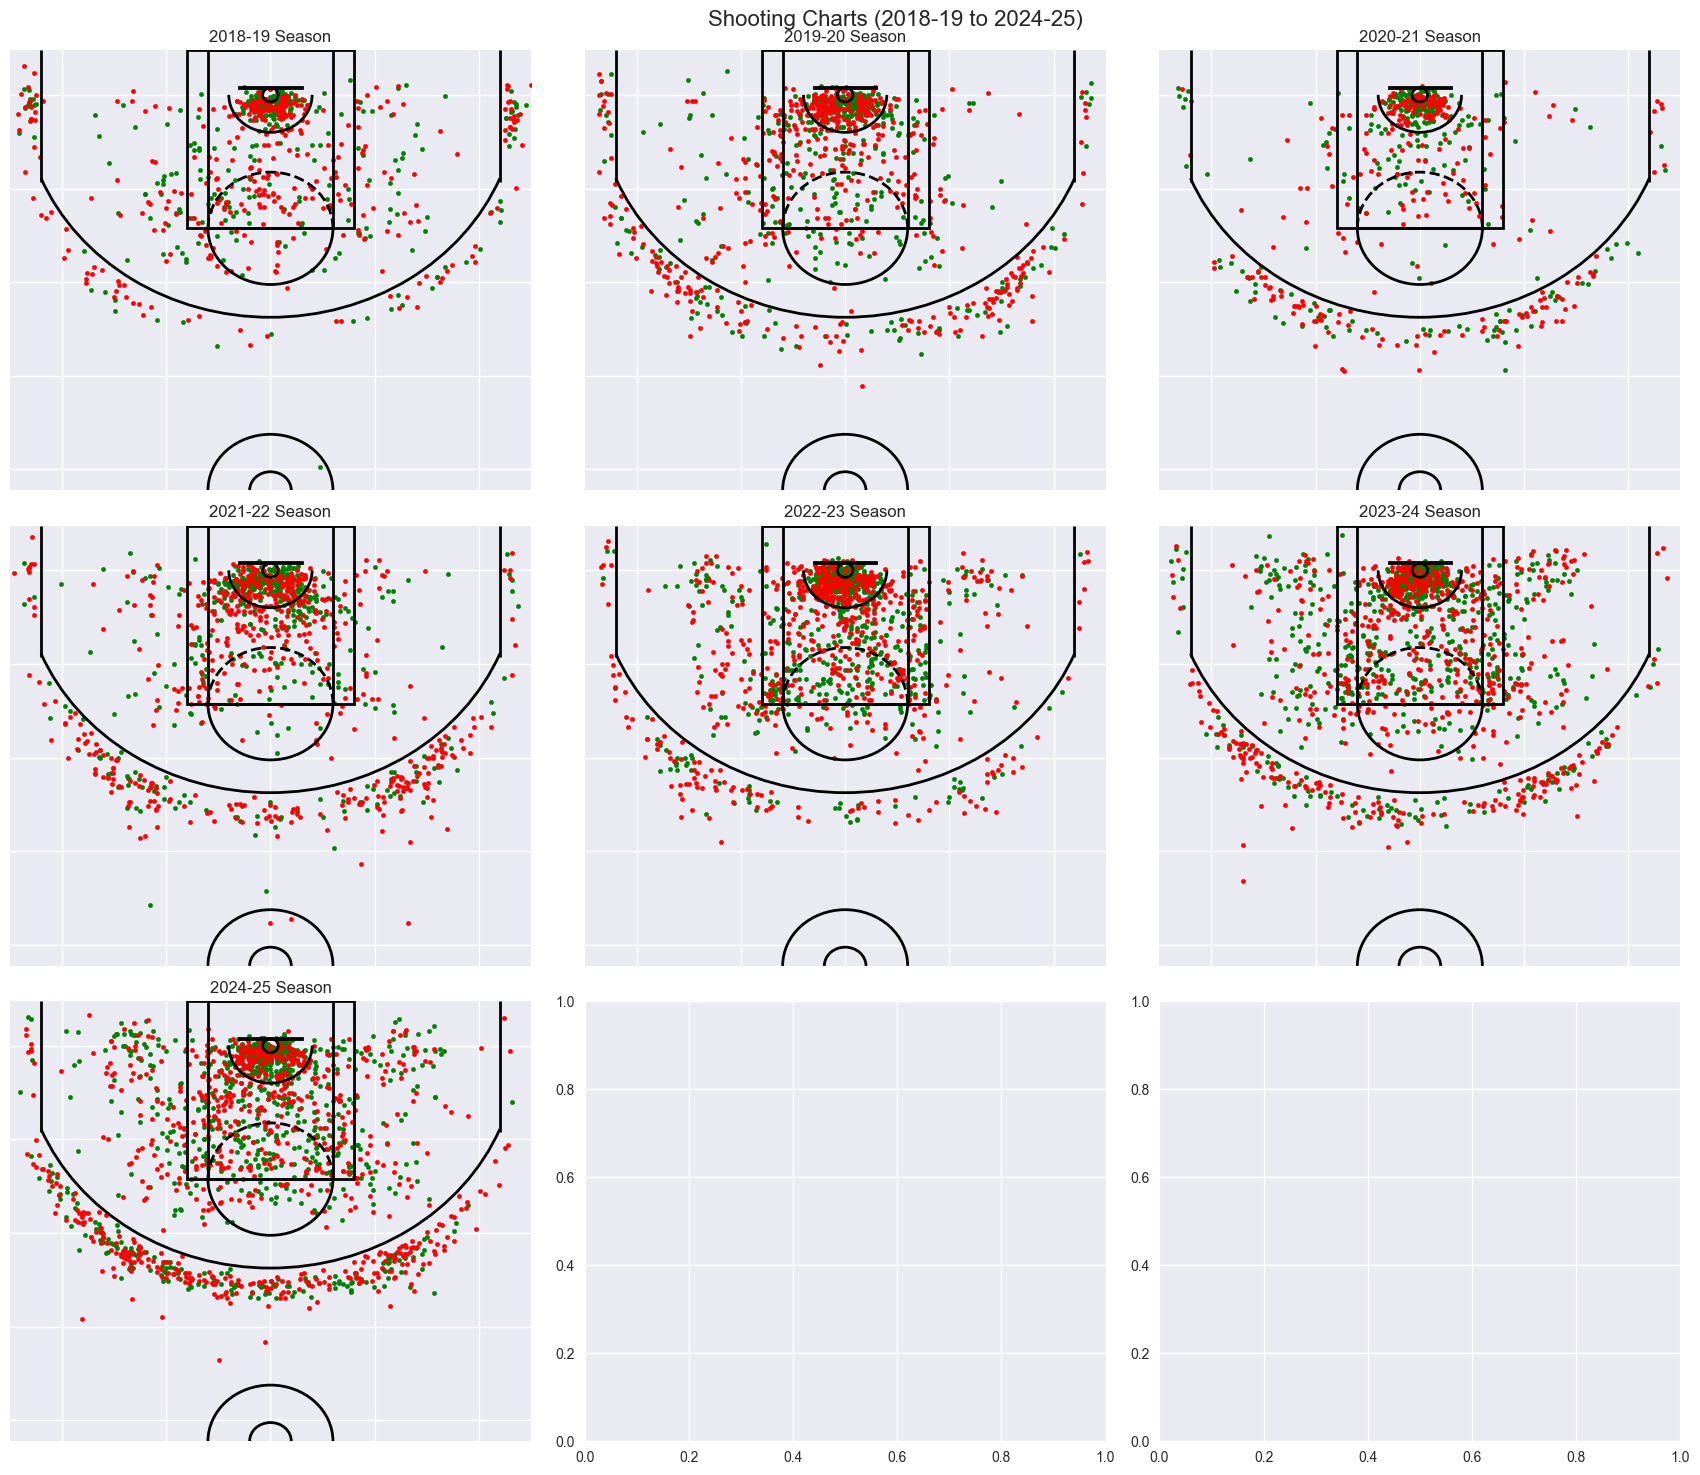

In [22]:
rows = 3  # Number of rows
cols = 3  # Number of columns (2 per row)

fig, axes = plt.subplots(rows, cols, figsize=(18, 15))  # Create subplots with a 3x2 grid

for i, season in enumerate(seasons):
    # Get shot data for each season
    shot_chart = get_shot_chart(player_id=player_id, year=season)
    
    # Track shots made and missed
    made_shots = shot_chart[shot_chart['SHOT_MADE_FLAG'] == 1]
    missed_shots = shot_chart[shot_chart['SHOT_MADE_FLAG'] == 0]
    
    # Determine the row and column index for the subplot
    row = i // cols
    col = i % cols
    
    # Plot in the corresponding subplot
    ax = axes[row, col]
    ax.set_title(f'{season} Season')
    ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots', s=10)
    ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots', s=10)
    draw_court(ax=ax)  # Assuming draw_court function accepts an axis parameter
    ax.set_xlim(-250, 250)
    ax.set_ylim(422.5, -47.5)
    ax.axis('on')  # Turn off axis labels and ticks
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Add a main title
fig.suptitle('Shooting Charts (2018-19 to 2024-25)', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, .95, 1])
plt.show()


In [23]:
print("🏀 SHOT CHART EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# 1. BASIC SHOT DATA OVERVIEW
print("\n📊 SECTION 1: SHOT DATA OVERVIEW")
print("-" * 40)

print(f"📈 Total shots analyzed: {len(all_seasons_data):,}")
print(f"📅 Seasons covered: {all_seasons_data['SEASON'].nunique()}")
print(f"🎯 Shot types analyzed: {all_seasons_data['ACTION_TYPE'].nunique()}")

# Shot distribution by season
shots_by_season = all_seasons_data.groupby('SEASON').size()
print("\n📊 Shots per season:")
for season, count in shots_by_season.items():
    print(f"   {season}: {count:,} shots")

🏀 SHOT CHART EXPLORATORY DATA ANALYSIS

📊 SECTION 1: SHOT DATA OVERVIEW
----------------------------------------
📈 Total shots analyzed: 7,872
📅 Seasons covered: 7
🎯 Shot types analyzed: 40

📊 Shots per season:
   2018-19: 716 shots
   2019-20: 1,015 shots
   2020-21: 565 shots
   2021-22: 1,052 shots
   2022-23: 1,381 shots
   2023-24: 1,487 shots
   2024-25: 1,656 shots



🎯 SECTION 2: SHOT TYPE EVOLUTION
----------------------------------------


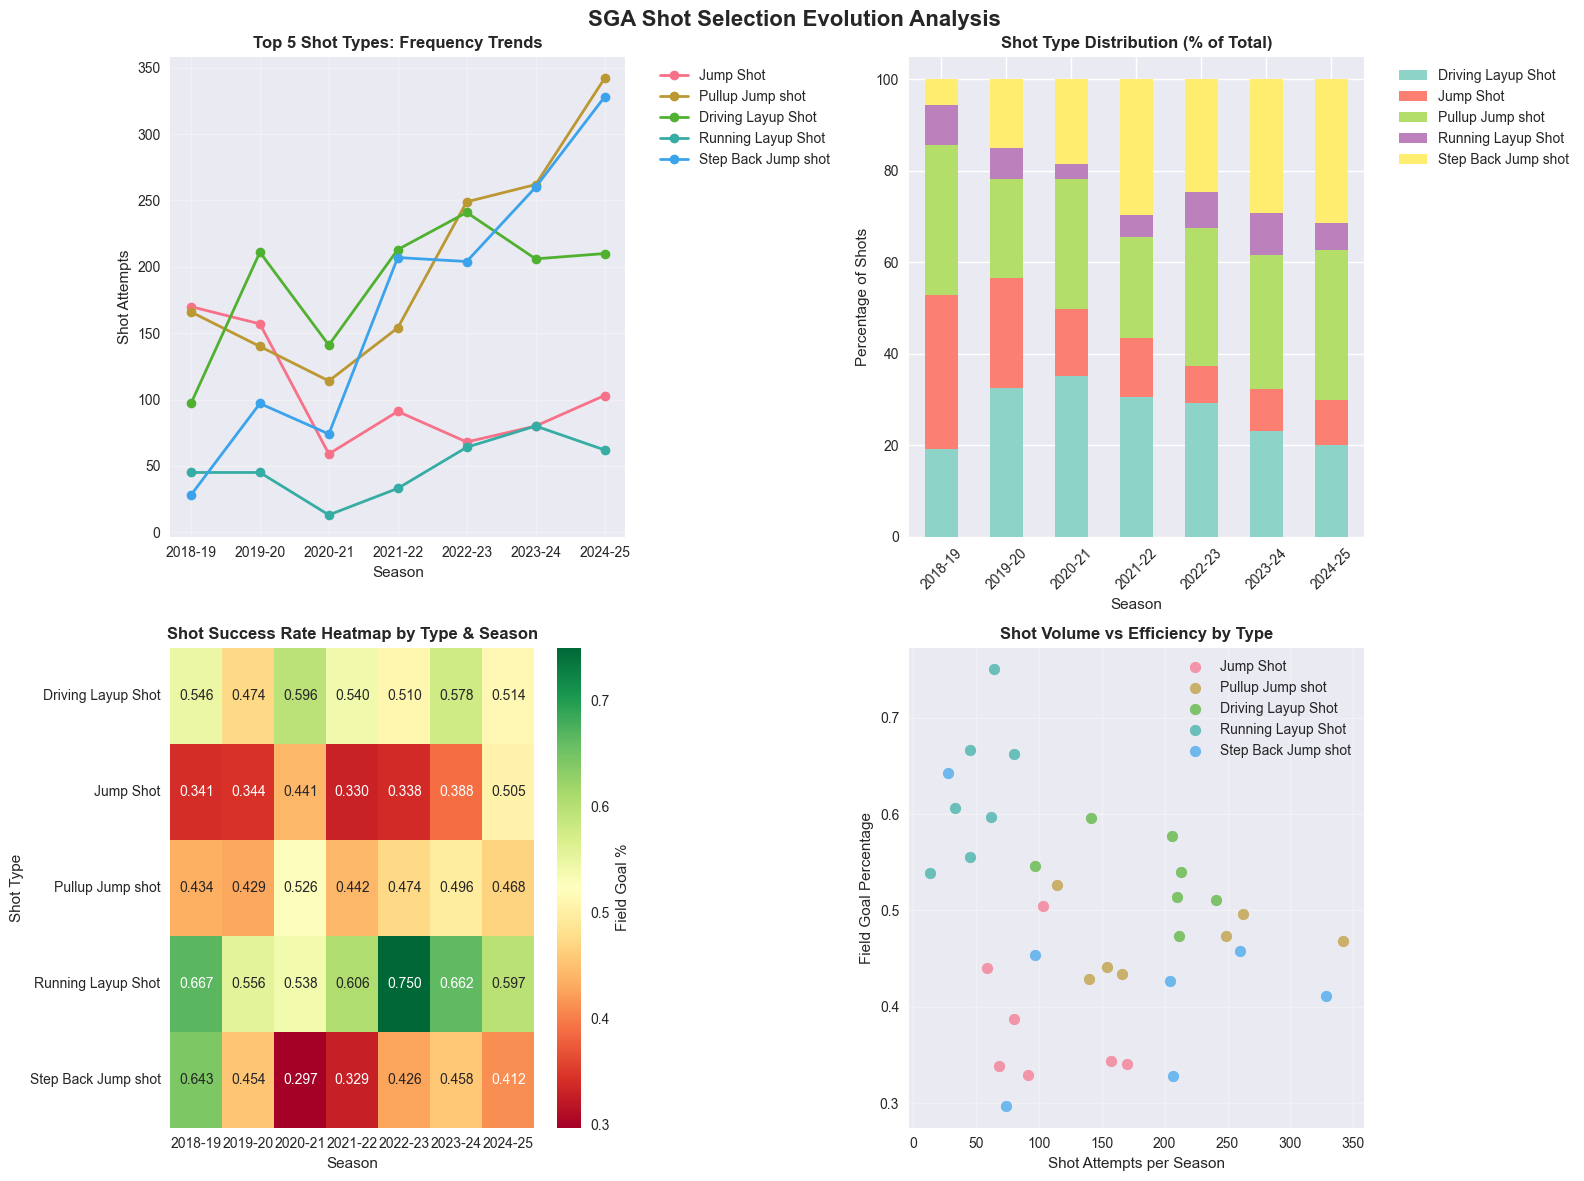

In [24]:
print(f"\n🎯 SECTION 2: SHOT TYPE EVOLUTION")
print("-" * 40)

# Create shot type evolution visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SGA Shot Selection Evolution Analysis', fontsize=16, fontweight='bold')

# 2.1 Top Actions Frequency Over Time
action_counts = filtered_data.groupby(['SEASON', 'ACTION_TYPE']).size().unstack(fill_value=0)
ax1 = axes[0, 0]
for action in top_actions:
    ax1.plot(action_counts.index, action_counts[action], marker='o', linewidth=2, label=action)
ax1.set_title('Top 5 Shot Types: Frequency Trends', fontweight='bold')
ax1.set_xlabel('Season')
ax1.set_ylabel('Shot Attempts')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# 2.2 Shot Type Percentage Distribution
shot_pct_by_season = filtered_data.groupby(['SEASON', 'ACTION_TYPE']).size().unstack(fill_value=0)
shot_pct_by_season = shot_pct_by_season.div(shot_pct_by_season.sum(axis=1), axis=0) * 100

ax2 = axes[0, 1]
shot_pct_by_season.plot(kind='bar', stacked=True, ax=ax2, colormap='Set3')
ax2.set_title('Shot Type Distribution (% of Total)', fontweight='bold')
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage of Shots')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

# 2.3 Shot Success Rate by Type
success_rate = filtered_data.groupby(['SEASON', 'ACTION_TYPE'])['SHOT_MADE_FLAG'].mean().unstack(fill_value=0)
ax3 = axes[1, 0]
sns.heatmap(success_rate.T, annot=True, fmt='.3f', cmap='RdYlGn', ax=ax3, cbar_kws={'label': 'Field Goal %'})
ax3.set_title('Shot Success Rate Heatmap by Type & Season', fontweight='bold')
ax3.set_xlabel('Season')
ax3.set_ylabel('Shot Type')

# 2.4 Shot Volume vs Efficiency Scatter
ax4 = axes[1, 1]
for action in top_actions:
    action_data = filtered_data[filtered_data['ACTION_TYPE'] == action]
    volumes = action_data.groupby('SEASON').size()
    efficiency = action_data.groupby('SEASON')['SHOT_MADE_FLAG'].mean()
    ax4.scatter(volumes, efficiency, label=action, s=60, alpha=0.7)

ax4.set_title('Shot Volume vs Efficiency by Type', fontweight='bold')
ax4.set_xlabel('Shot Attempts per Season')
ax4.set_ylabel('Field Goal Percentage')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
print(f"\n🗺️ SECTION 3: SPATIAL SHOOTING ANALYSIS")
print("-" * 40)

# Zone-based analysis
def categorize_shot_zone(row):
    x, y = row['LOC_X'], row['LOC_Y']
    
    # Paint area
    if abs(x) <= 80 and y <= 190:
        return 'Paint'
    # Close mid-range
    elif abs(x) <= 160 and y <= 280:
        return 'Close Mid-Range'
    # Long mid-range (inside 3pt line)
    elif np.sqrt(x**2 + y**2) <= 237.5:
        return 'Long Mid-Range'
    # Corner 3
    elif abs(x) >= 220 and y <= 92.5:
        return 'Corner 3'
    # Above the break 3
    else:
        return 'Above Break 3'

all_seasons_data['ZONE'] = all_seasons_data.apply(categorize_shot_zone, axis=1)

# Zone analysis by season
zone_analysis = all_seasons_data.groupby(['SEASON', 'ZONE']).agg({
    'SHOT_MADE_FLAG': ['count', 'sum', 'mean']
}).round(3)

zone_analysis.columns = ['Attempts', 'Makes', 'FG%']
zone_analysis = zone_analysis.reset_index()

print("📍 Shot distribution by zone:")
zone_summary = all_seasons_data.groupby('ZONE').agg({
    'SHOT_MADE_FLAG': ['count', 'mean']
}).round(3)
zone_summary.columns = ['Total_Attempts', 'FG%']
print(zone_summary.sort_values('Total_Attempts', ascending=False))



🗺️ SECTION 3: SPATIAL SHOOTING ANALYSIS
----------------------------------------
📍 Shot distribution by zone:
                 Total_Attempts    FG%
ZONE                                  
Paint                      5076  0.555
Close Mid-Range            2104  0.418
Above Break 3               443  0.323
Long Mid-Range              216  0.417
Corner 3                     33  0.424


In [26]:
print(f"\n🎯 SECTION 4: ADVANCED SHOT METRICS")
print("-" * 40)

# Calculate advanced metrics by season
advanced_metrics = []
for season in all_seasons_data['SEASON'].unique():
    season_data = all_seasons_data[all_seasons_data['SEASON'] == season]
    
    # Basic shooting stats
    total_attempts = len(season_data)
    total_makes = season_data['SHOT_MADE_FLAG'].sum()
    fg_pct = total_makes / total_attempts if total_attempts > 0 else 0
    
    # 3-point shooting
    three_pt_attempts = season_data[season_data['SHOT_TYPE'] == '3PT Field Goal']
    three_pt_makes = three_pt_attempts['SHOT_MADE_FLAG'].sum()
    three_pt_pct = three_pt_makes / len(three_pt_attempts) if len(three_pt_attempts) > 0 else 0
    
    # 2-point shooting
    two_pt_attempts = season_data[season_data['SHOT_TYPE'] == '2PT Field Goal']
    two_pt_makes = two_pt_attempts['SHOT_MADE_FLAG'].sum()
    two_pt_pct = two_pt_makes / len(two_pt_attempts) if len(two_pt_attempts) > 0 else 0
    
    # Effective Field Goal Percentage
    efg_pct = (total_makes + 0.5 * three_pt_makes) / total_attempts if total_attempts > 0 else 0
    
    # Points per shot attempt
    two_pt_points = two_pt_makes * 2
    three_pt_points = three_pt_makes * 3
    total_points = two_pt_points + three_pt_points
    points_per_attempt = total_points / total_attempts if total_attempts > 0 else 0
    
    advanced_metrics.append({
        'Season': season,
        'Total_Attempts': total_attempts,
        'FG%': fg_pct,
        '2P%': two_pt_pct,
        '3P%': three_pt_pct,
        'eFG%': efg_pct,
        'PTS/Attempt': points_per_attempt,
        '3P_Rate': len(three_pt_attempts) / total_attempts if total_attempts > 0 else 0
    })

advanced_df = pd.DataFrame(advanced_metrics)
print("\n📊 Advanced shooting metrics by season:")
print(advanced_df.round(3))


🎯 SECTION 4: ADVANCED SHOT METRICS
----------------------------------------

📊 Advanced shooting metrics by season:
    Season  Total_Attempts    FG%    2P%    3P%   eFG%  PTS/Attempt  3P_Rate
0  2018-19             716  0.476  0.503  0.367  0.512        1.024    0.194
1  2019-20            1015  0.471  0.512  0.347  0.514        1.028    0.247
2  2020-21             565  0.508  0.547  0.418  0.571        1.142    0.301
3  2021-22            1052  0.453  0.514  0.300  0.496        0.991    0.282
4  2022-23            1381  0.510  0.533  0.345  0.531        1.062    0.122
5  2023-24            1487  0.535  0.576  0.353  0.567        1.134    0.181
6  2024-25            1656  0.519  0.571  0.375  0.569        1.137    0.263


In [27]:
print("📈 Shot type improvements over career:")
first_season = seasons[0]
latest_season = seasons[-1]

for action in top_actions:
    first_fg = filtered_data[(filtered_data['SEASON'] == first_season) & 
                           (filtered_data['ACTION_TYPE'] == action)]['SHOT_MADE_FLAG'].mean()
    latest_fg = filtered_data[(filtered_data['SEASON'] == latest_season) & 
                            (filtered_data['ACTION_TYPE'] == action)]['SHOT_MADE_FLAG'].mean()
    
    if not np.isnan(first_fg) and not np.isnan(latest_fg):
        improvement = latest_fg - first_fg
        print(f"   {action}: {first_fg:.1%} → {latest_fg:.1%} ({improvement:+.1%})")

# Most frequent shots in different zones
print(f"\n🎯 Most common shots by zone:")
zone_actions = all_seasons_data.groupby(['ZONE', 'ACTION_TYPE']).size().reset_index()
zone_actions.columns = ['Zone', 'Action', 'Count']
for zone in all_seasons_data['ZONE'].unique():
    top_action_in_zone = zone_actions[zone_actions['Zone'] == zone].nlargest(1, 'Count')
    if not top_action_in_zone.empty:
        action = top_action_in_zone.iloc[0]['Action']
        count = top_action_in_zone.iloc[0]['Count']
        print(f"   {zone}: {action} ({count} attempts)")

print(f"\n✅ SUMMARY INSIGHTS:")
print("-" * 20)
best_zone = all_seasons_data.groupby('ZONE')['SHOT_MADE_FLAG'].mean().idxmax()
best_zone_pct = all_seasons_data.groupby('ZONE')['SHOT_MADE_FLAG'].mean().max()
print(f"🏆 Most efficient zone: {best_zone} ({best_zone_pct:.1%})")

most_frequent_shot = all_seasons_data['ACTION_TYPE'].value_counts().index[0]
most_frequent_count = all_seasons_data['ACTION_TYPE'].value_counts().iloc[0]
print(f"🎯 Most frequent shot: {most_frequent_shot} ({most_frequent_count:,} attempts)")

total_career_fg = all_seasons_data['SHOT_MADE_FLAG'].mean()
print(f"📊 Overall career FG%: {total_career_fg:.1%}")

📈 Shot type improvements over career:
   Jump Shot: 34.1% → 50.5% (+16.4%)
   Pullup Jump shot: 43.4% → 46.8% (+3.4%)
   Driving Layup Shot: 54.6% → 51.4% (-3.2%)
   Running Layup Shot: 66.7% → 59.7% (-7.0%)
   Step Back Jump shot: 64.3% → 41.2% (-23.1%)

🎯 Most common shots by zone:
   Paint: Driving Layup Shot (1315 attempts)
   Close Mid-Range: Step Back Jump shot (762 attempts)
   Corner 3: Jump Shot (22 attempts)
   Long Mid-Range: Jump Shot (146 attempts)
   Above Break 3: Jump Shot (165 attempts)

✅ SUMMARY INSIGHTS:
--------------------
🏆 Most efficient zone: Paint (55.5%)
🎯 Most frequent shot: Pullup Jump shot (1,427 attempts)
📊 Overall career FG%: 50.1%



📈 SECTION 3: KEY STATISTICAL INSIGHTS
--------------------------------------------------
🏀 Career Averages:
   PPG: 24.60
   RPG: 4.83
   APG: 5.21
   FG%: 0.50
   FT%: 0.84
   3FG%: 0.36
   MPG: 33.33

📊 Career Progression Analysis:
   • Scoring Growth: 10.8 → 32.7 PPG (201.5% increase)
   • Playmaking Growth: 3.3 → 6.4 APG (94.2% increase)
   • Rebounding Growth: 2.8 → 5.0 RPG (76.3% increase)

🏆 Peak Performances:
   • Best Scoring: 32.7 PPG in 2024-25
   • Best Playmaking: 6.4 APG in 2024-25
   • Best Shooting: 53.5% FG% in 2023-24

🤖 SECTION 4: 2025-26 PERFORMANCE PREDICTION
--------------------------------------------------


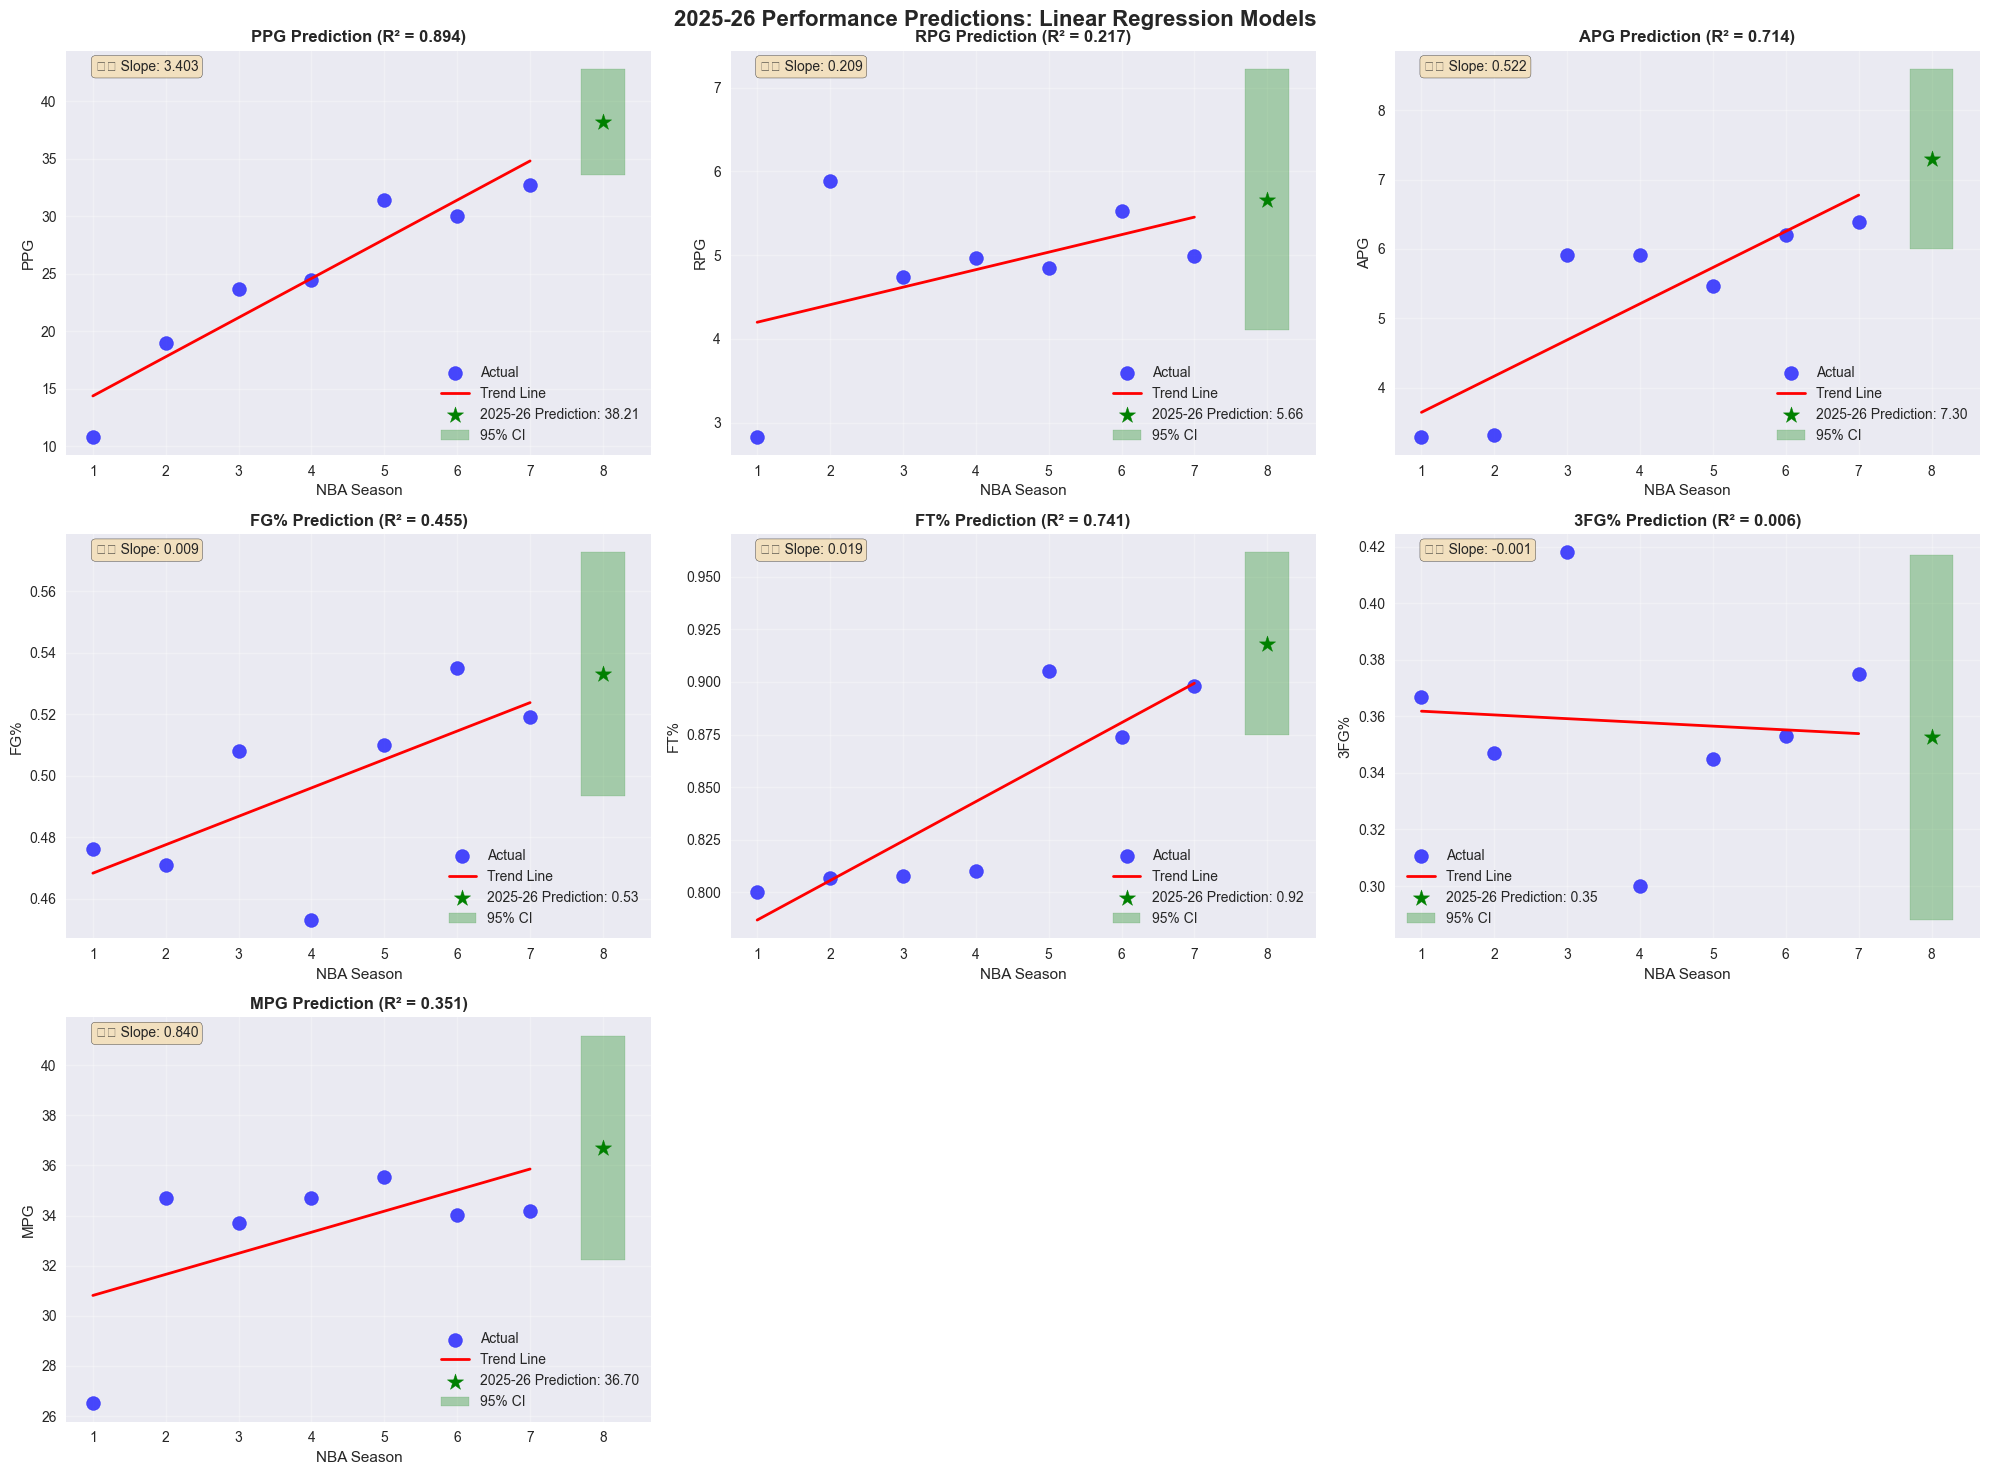

In [17]:
print(f"\n📈 SECTION 3: KEY STATISTICAL INSIGHTS")
print("-" * 50)

# Career averages and trends
print("🏀 Career Averages:")
career_avgs = df_career[['PPG', 'RPG', 'APG', 'FG%', 'FT%', '3FG%', 'MPG']].mean()
for stat, avg in career_avgs.items():
    print(f"   {stat}: {avg:.2f}")

print(f"\n📊 Career Progression Analysis:")
print(f"   • Scoring Growth: {df_career['PPG'].iloc[0]:.1f} → {df_career['PPG'].iloc[-1]:.1f} PPG ({((df_career['PPG'].iloc[-1]/df_career['PPG'].iloc[0])-1)*100:.1f}% increase)")
print(f"   • Playmaking Growth: {df_career['APG'].iloc[0]:.1f} → {df_career['APG'].iloc[-1]:.1f} APG ({((df_career['APG'].iloc[-1]/df_career['APG'].iloc[0])-1)*100:.1f}% increase)")
print(f"   • Rebounding Growth: {df_career['RPG'].iloc[0]:.1f} → {df_career['RPG'].iloc[-1]:.1f} RPG ({((df_career['RPG'].iloc[-1]/df_career['RPG'].iloc[0])-1)*100:.1f}% increase)")

# Peak performance analysis
peak_ppg_season = df_career.loc[df_career['PPG'].idxmax()]
print(f"\n🏆 Peak Performances:")
print(f"   • Best Scoring: {peak_ppg_season['PPG']:.1f} PPG in {peak_ppg_season['Season']}")
print(f"   • Best Playmaking: {df_career['APG'].max():.1f} APG in {df_career.loc[df_career['APG'].idxmax(), 'Season']}")
print(f"   • Best Shooting: {df_career['FG%'].max():.1%} FG% in {df_career.loc[df_career['FG%'].idxmax(), 'Season']}")

# 4. LINEAR REGRESSION MODEL FOR 2025-26 PREDICTION
print(f"\n🤖 SECTION 4: 2025-26 PERFORMANCE PREDICTION")
print("-" * 50)

# Prepare data for regression
X = df_career['NBA_Year'].values.reshape(-1, 1)
metrics_to_predict = ['PPG', 'RPG', 'APG', 'FG%', 'FT%', '3FG%', 'MPG']

predictions_2026 = {}
model_performance = {}

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('2025-26 Performance Predictions: Linear Regression Models', fontsize=16, fontweight='bold')

for i, metric in enumerate(metrics_to_predict):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    y = df_career[metric].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Make prediction for 2025-26 (Year 8)
    next_year = np.array([[8]])  # 8th NBA season
    prediction = model.predict(next_year)[0]
    predictions_2026[metric] = prediction
    
    # Calculate model performance
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    model_performance[metric] = {'R²': r2, 'RMSE': rmse}
    
    # Visualization
    ax.scatter(X, y, color='blue', s=100, alpha=0.7, label='Actual')
    ax.plot(X, y_pred, color='red', linewidth=2, label='Trend Line')
    ax.scatter(8, prediction, color='green', s=150, marker='*', label=f'2025-26 Prediction: {prediction:.2f}')
    
    # Confidence interval (simple approach)
    residuals = y - y_pred
    std_residual = np.std(residuals)
    ax.fill_between([8-0.3, 8+0.3], [prediction-1.96*std_residual]*2, [prediction+1.96*std_residual]*2, 
                   alpha=0.3, color='green', label='95% CI')
    
    ax.set_title(f'{metric} Prediction (R² = {r2:.3f})', fontweight='bold')
    ax.set_xlabel('NBA Season')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add trend information
    slope = model.coef_[0]
    trend_direction = "↗️" if slope > 0 else "↘️" if slope < 0 else "→"
    ax.text(0.05, 0.95, f'{trend_direction} Slope: {slope:.3f}', transform=ax.transAxes, 
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Remove empty subplots
for i in range(len(metrics_to_predict), 9):
    row = i // 3
    col = i % 3
    axes[row, col].remove()

plt.tight_layout()
plt.show()

In [18]:
print(f"\n🎯 2025-26 PREDICTION SUMMARY")
print("=" * 50)
print(f"Based on linear regression analysis of {len(df_career)} seasons:")
print()

for metric, prediction in predictions_2026.items():
    current_value = df_career[metric].iloc[-1]
    change = prediction - current_value
    change_pct = (change / current_value) * 100 if current_value != 0 else 0
    r2 = model_performance[metric]['R²']
    
    confidence = "High" if r2 > 0.8 else "Medium" if r2 > 0.5 else "Low"
    direction = "📈" if change > 0 else "📉" if change < 0 else "➡️"
    
    print(f"🏀 {metric}:")
    print(f"   Current (2024-25): {current_value:.2f}")
    print(f"   Predicted (2025-26): {prediction:.2f}")
    print(f"   Change: {direction} {change:+.2f} ({change_pct:+.1f}%)")
    print(f"   Model Confidence: {confidence} (R² = {r2:.3f})")
    print()


🎯 2025-26 PREDICTION SUMMARY
Based on linear regression analysis of 7 seasons:

🏀 PPG:
   Current (2024-25): 32.68
   Predicted (2025-26): 38.21
   Change: 📈 +5.53 (+16.9%)
   Model Confidence: High (R² = 0.894)

🏀 RPG:
   Current (2024-25): 4.99
   Predicted (2025-26): 5.66
   Change: 📈 +0.67 (+13.5%)
   Model Confidence: Low (R² = 0.217)

🏀 APG:
   Current (2024-25): 6.39
   Predicted (2025-26): 7.30
   Change: 📈 +0.91 (+14.2%)
   Model Confidence: Medium (R² = 0.714)

🏀 FG%:
   Current (2024-25): 0.52
   Predicted (2025-26): 0.53
   Change: 📈 +0.01 (+2.7%)
   Model Confidence: Low (R² = 0.455)

🏀 FT%:
   Current (2024-25): 0.90
   Predicted (2025-26): 0.92
   Change: 📈 +0.02 (+2.2%)
   Model Confidence: Medium (R² = 0.741)

🏀 3FG%:
   Current (2024-25): 0.38
   Predicted (2025-26): 0.35
   Change: 📉 -0.02 (-6.0%)
   Model Confidence: Low (R² = 0.006)

🏀 MPG:
   Current (2024-25): 34.18
   Predicted (2025-26): 36.70
   Change: 📈 +2.52 (+7.4%)
   Model Confidence: Low (R² = 0.351)



In [19]:
assessment_score = sum([model_performance[metric]['R²'] for metric in metrics_to_predict]) / len(metrics_to_predict)
print(f"\n✅ OVERALL MODEL ASSESSMENT")
print("-" * 35)
print(f"🎯 Average Model R²: {assessment_score:.3f}")
if assessment_score > 0.7:
    confidence_level = "HIGH"
    emoji = "🟢"
elif assessment_score > 0.4:
    confidence_level = "MEDIUM"
    emoji = "🟡"
else:
    confidence_level = "LOW"
    emoji = "🔴"

print(f"{emoji} Prediction Confidence: {confidence_level}")
print(f"\n📝 Summary: Based on {len(df_career)} seasons of data, SGA shows {'strong' if assessment_score > 0.7 else 'moderate' if assessment_score > 0.4 else 'weak'} predictable trends.")
print(f"The linear models suggest {'continued growth' if predictions_2026['PPG'] > df_career['PPG'].iloc[-1] else 'stabilization'} in key performance metrics for 2025-26.")

print("\n" + "=" * 80)
print("🏀 END OF ANALYSIS 🏀")


✅ OVERALL MODEL ASSESSMENT
-----------------------------------
🎯 Average Model R²: 0.482
🟡 Prediction Confidence: MEDIUM

📝 Summary: Based on 7 seasons of data, SGA shows moderate predictable trends.
The linear models suggest continued growth in key performance metrics for 2025-26.

🏀 END OF ANALYSIS 🏀
